# Homework: Decipherment

In [1]:
from collections import defaultdict, Counter
import collections
import pprint
import math
import bz2
pp = pprint.PrettyPrinter(width=45, compact=True)

First let us read in the cipher text from the `data` directory:

In [2]:
def read_file(filename):
    if filename[-4:] == ".bz2":
        with bz2.open(filename, 'rt') as f:
            content = f.read()
            f.close()
    else:
        with open(filename, 'r') as f:
            content = f.read()
            f.close()
    return content

cipher = read_file("data/cipher.txt")
print(cipher)

º∫P/Z/uB∫ÀOR•–X•B
WV+≈GyF∞ºHPπKÇ—y≈
MJy^uIÀΩ—T‘NQyDµ£
S¢/º∑BPORAu∫∆RÃ—E
À^LMZJƒ“\–FHVW≈æy
π+—GDºKI£∞—Xæµ§S¢
RN‘IyEÃOæ—GBTQS∑B
Lƒ/P∑BπX—EHMu^RRÀ
√ZK—–I£W—ÇæµLM“º∑
BPDR+j•∞\N¢≈EuHÀF
Z√–OVWIµ+‘L£Ã^R∞H
IºDR∏Ty“\ƒ≈/πXJQA
PµMæRu‘∫L£NVEKH•G
“IÇJÀµºæLMÃNA£Z¢P
§u–ÀAº∑BVW\+VT‘OP
^•S“Ã∆u≈∞ΩD§G∫∫IM
NÀ£S√E/º∫∫Z∆AP∑BV
–≈X—W—∏F∑æ√+πºAºB
∫OTµRu√+∏ƒy—∏^S—W
VZ≈GyKE∏TyAº∫∑L‘∏
HÇFBXº§XADƒ\ΩLÇ•—
∏≈ƒ∑∑∞≈µPORXQF∫G√
ZπJT‘—∏æJI+“BPQW∞
VEX“ºWI∞—EHM£•uIÀ


## Default Solution

For the default solution we need to compute statistics like length, number of symbols/letters, 
unique occurences, frequencies and relative frequencies of a given file. This is done in the function `get_statistics` below.

While using `get_statistics`, make sure that `cipher=True` is set when the input is a ciphertext.

In [3]:
def get_statistics(content, cipher=True):
    stats = {}
    content = list(content)
    split_content = [x for x in content if x != '\n' and x!=' ']
    length = len(split_content)
    symbols = set(split_content)
    uniq_sym = len(list(symbols))
    freq = collections.Counter(split_content)
    rel_freq = {}
    for sym, frequency in freq.items():
        rel_freq[sym] = (frequency/length)*100
        
    if cipher:
        stats = {'content':split_content, 'length':length, 'vocab':list(symbols), 'vocab_length':uniq_sym, 'frequencies':freq, 'relative_freq':rel_freq}
    else:
        stats = {'length':length, 'vocab':list(symbols), 'vocab_length':uniq_sym, 'frequencies':freq, 'relative_freq':rel_freq}
    return stats

In [4]:
cipher_desc = get_statistics(cipher, cipher=True)
pp.pprint(cipher_desc)

{'content': ['º', '∫', 'P', '/', 'Z', '/',
             'u', 'B', '∫', 'À', 'O', 'R',
             '•', '–', 'X', '•', 'B', 'W',
             'V', '+', '≈', 'G', 'y', 'F',
             '∞', 'º', 'H', 'P', 'π', 'K',
             'Ç', '—', 'y', '≈', 'M', 'J',
             'y', '^', 'u', 'I', 'À', 'Ω',
             '—', 'T', '‘', 'N', 'Q', 'y',
             'D', 'µ', '£', 'S', '¢', '/',
             'º', '∑', 'B', 'P', 'O', 'R',
             'A', 'u', '∫', '∆', 'R', 'Ã',
             '—', 'E', 'À', '^', 'L', 'M',
             'Z', 'J', 'ƒ', '“', '\\', '–',
             'F', 'H', 'V', 'W', '≈', 'æ',
             'y', 'π', '+', '—', 'G', 'D',
             'º', 'K', 'I', '£', '∞', '—',
             'X', 'æ', 'µ', '§', 'S', '¢',
             'R', 'N', '‘', 'I', 'y', 'E',
             'Ã', 'O', 'æ', '—', 'G', 'B',
             'T', 'Q', 'S', '∑', 'B', 'L',
             'ƒ', '/', 'P', '∑', 'B', 'π',
             'X', '—', 'E', 'H', 'M', 'u',
             '^', 'R', 'R', 'À', '√', 'Z',
          

The default solution matches the frequency of symbols in the cipher text with frequency of letters in the plaintext language (in this case, English). Note that this is just some text in English used to compute letter frequencies. We do not have access to the real plaintext in this homework. 

In order to do compute plaintext frequencies, we use an English dataset has no punctuation or spaces and all characters are lowercase.

In [5]:
# plaintext description
plaintxt = read_file("data/default.wiki.txt.bz2")
plaintxt_desc = get_statistics(plaintxt, cipher=False)
pp.pprint(plaintxt_desc)

{'frequencies': Counter({'e': 1001029,
                         't': 725515,
                         'a': 716871,
                         'i': 609790,
                         'n': 605384,
                         'o': 595295,
                         'r': 547660,
                         's': 544866,
                         'h': 404479,
                         'l': 340389,
                         'd': 339004,
                         'c': 271811,
                         'u': 215523,
                         'm': 214359,
                         'f': 184661,
                         'g': 168439,
                         'p': 166824,
                         'w': 142745,
                         'b': 130070,
                         'y': 126667,
                         'v': 86098,
                         'k': 56452,
                         'j': 18131,
                         'x': 15796,
                         'z': 9903,
                         'q': 7356}),
 'length': 824511

We have all the tools we need to describe the default solution to this homework.

We use a simple frequency matching heuristic to map cipher symbols to English letters.

We match the frequencies using the function $f(\cdot)$ of each cipher symbol $c$ with each English letter $e$:

$$h_{c,e} = | \log(\frac{f(c)}{f(e)})) | $$

For each cipher text symbol $c$ we then compute the most likely plain text symbol $e$ by sorting based on the above score.

In [6]:
"""
default : frequency matching heuristic

Notice how the candidate mappings, a.k.a hypotheses, are first scored with a measure of quality and, 
then, the best scoring hypothesis is chosen as the winner. 

The plaintext letters from the winner are then mapped to the respective ciphertext symbols.
"""

def find_mappings(ciphertext, plaintext):
    mappings = defaultdict(dict)
    hypotheses = defaultdict(dict)
    # calculate alignment scores
    for symbol in ciphertext['vocab']:
        for letter in plaintext['vocab']:
            hypotheses[symbol][letter] = abs(math.log((ciphertext['relative_freq'][symbol]/plaintext['relative_freq'][letter])))
    
    # find winner
    for sym in hypotheses.keys():
        #mappings[sym] = min(lemma_alignment[sym], key=lemma_alignment[sym].get)
        winner = sorted(hypotheses[sym].items(), key=lambda kv: kv[1])
        mappings[sym] = winner[1][0]
    
    return mappings

Using this scoring function we map the cipher symbol `∆` to `v` in English

In [7]:
mapping = find_mappings(cipher_desc, plaintxt_desc)
print("∆ maps to {}\n".format(mapping['∆']))
print(mapping)

∆ maps to v

defaultdict(<class 'dict'>, {'N': 'b', '^': 'b', 'u': 'u', 'ƒ': 'b', '•': 'b', 'P': 'm', '—': 'l', '§': 'k', 'J': 'b', 'R': 'u', 'V': 'g', 'O': 'b', 'j': 'x', 'E': 'g', '≈': 'u', 'æ': 'g', 'Z': 'g', 'B': 'u', 'I': 'm', 'L': 'g', '∏': 'g', 'y': 'u', 'µ': 'g', 'D': 'b', 'X': 'g', '£': 'g', 'º': 'd', 'W': 'g', '‘': 'b', '\\': 'y', '+': 'g', '∆': 'v', '∑': 'u', 'F': 'b', 'Q': 'y', '¢': 'k', '√': 'b', '∫': 'm', 'π': 'b', 'G': 'b', 'T': 'b', 'K': 'y', 'S': 'b', 'M': 'g', '–': 'b', 'Ω': 'v', 'Ã': 'y', '/': 'b', 'A': 'g', 'Ç': 'y', '“': 'b', '∞': 'g', 'H': 'g', 'À': 'g'})


The default solution to this decipherment problem is to take each cipher symbol and map it to the most likely English letter as provided by the `find_mappings` function above.

In [8]:
english_text = []
for symbol in cipher_desc['content']:
    english_text.append(mapping[symbol])
decipherment = ('').join(english_text)
print(decipherment)

dmmbgbuumgbubbgbugggububgdgmbyyluugbubumgvlbbbyubggbkbduumbugumvuylggbgggbbbybbgggugubglbbdymgglgggkbkubbmugybglbubybuugbbmuubglgggubuugbgylbmgglyggggbduumbugxbgybkuguggbgbbbggmggbggybuggmdbugbubybubbgbygmggguubmggbggygbbbmybggdgggybgggkmkubggduuggyggbbbmbbbbyvuugvbkbmmmgbggbbgbdmmgvgmuugbuglglgbugbgbdgdumbbguubggbulgbblgggubuyggbugdmugbggybugdkggbbyvgyblgubuugugmbugybmbbgbbbblggbmgbumygggggbdgmglggggbumg


# Beam Search Terms
- ext_order = list of cypher symbols sorted by their frequencies
- ext_limits = constraint for max number of cipher symbols that can map to each english letter
- Hs = set of decipherment  ϕ  which have already been scored and pruned
- Ht = store all extensions for each hypothesis ϕ
- Cardinality = number of cipher symbols already mapped to plaintext
- Histrogram_prune = keeps the best scoring hypothesis and prunes the rest 
- Vf = ciphertext
- Ve = plaintext

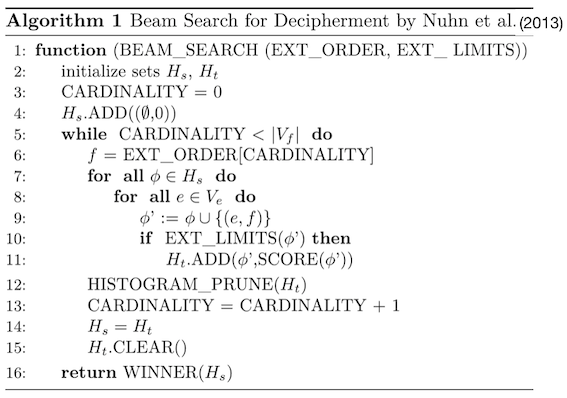

In [9]:
len(cipher_desc["relative_freq"].values())

54

In [10]:
symbol_list = []; 
symbol_relFreq = []; 
for x, y in cipher_desc["relative_freq"].items():
    symbol_list.append(x)
    symbol_relFreq.append(y)

In [77]:
index_names = {}
for i in range(54):
    index_names[i] = symbol_list[i]

In [78]:
index_names

{0: 'º',
 1: '∫',
 2: 'P',
 3: '/',
 4: 'Z',
 5: 'u',
 6: 'B',
 7: 'À',
 8: 'O',
 9: 'R',
 10: '•',
 11: '–',
 12: 'X',
 13: 'W',
 14: 'V',
 15: '+',
 16: '≈',
 17: 'G',
 18: 'y',
 19: 'F',
 20: '∞',
 21: 'H',
 22: 'π',
 23: 'K',
 24: 'Ç',
 25: '—',
 26: 'M',
 27: 'J',
 28: '^',
 29: 'I',
 30: 'Ω',
 31: 'T',
 32: '‘',
 33: 'N',
 34: 'Q',
 35: 'D',
 36: 'µ',
 37: '£',
 38: 'S',
 39: '¢',
 40: '∑',
 41: 'A',
 42: '∆',
 43: 'Ã',
 44: 'E',
 45: 'L',
 46: 'ƒ',
 47: '“',
 48: '\\',
 49: 'æ',
 50: '§',
 51: '√',
 52: 'j',
 53: '∏'}

In [88]:
import numpy
import pandas as pd
test_data = numpy.ones((54,26))

In [89]:
df = pd.DataFrame(test_data, columns = plaintxt_desc['vocab'])
df.rename(index = index_names )

,u,f,e,b,q,k,v,j,c,m,...,g,h,a,r,t,s,w,x,d,p
º,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
∫,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
/,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Z,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
u,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
À,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
O,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
R,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [11]:

# beam search
def beam_search(ext_order, ext_limits):
    Hs = defaultdict(dict)
    Ht = defaultdict(dict)
    cardinality = 0
    Hs['null'] = 0

    while cardinality < len(cipher_desc['vocab']) - 1:
        f = ext_order[cardinality]
        for i in range(len(Hs)-1):
            for j in range(len(plaintxt_desc['vocab'])):
                candidate = [Hs + [j], i * -log
                if ext_limits:
                    #all_candidates.append(candidate)
        histogram_prune
        cardinality = cardinality + 1
        for sym in hypotheses.keys():
        #mappings[sym] = min(lemma_alignment[sym], key=lemma_alignment[sym].get)
            winner = sorted(hypotheses[sym].items(), key=lambda kv: kv[1])
            Hs[sym] = winner[1][0]
    return Hs



In [92]:
beam_search(cipher_desc['vocab'], 2)

NameError: name 'histogram_prune' is not defined